A notebook for capturing flat field data for each channel of OROS (the OROCHI Simulator).

# Process Overview

- Find Exposure time - aim for 3000 DN exposure, for SNR of ~120.
- Set spectralon in position
- Capture 36 repeat images, save the average and standard deviation
- Move spectralon
- Repeat
- Capture dark images at the given exposures.

# Setup

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
import numpy as np
import orochi_sim_ctrl as osc

In [ ]:
ic = osc.start_ic()
camera_config = osc.load_camera_config()
cameras = osc.connect_cameras(ic, camera_config)
osc.configure_cameras(cameras)

# Find ROIs

No - use existing ROIs

In [ ]:
# osc.find_camera_rois(cameras, roi_size=100)

# Find Exposures

In [ ]:
ff_exposures = osc.find_channel_exposures(cameras, init_t_exp=0.03, target=0.73, n_hot=5,tol=1, limit=10, roi=True)

# Capture Illuminated Images

In [9]:
subject = 'flat_field_illum_11072023'
n_positions = 25
ff_prelim = {}
running_dmean = {}
for camera in cameras:
    ff_prelim[camera.name] = [np.zeros((100,100))+2989.0]
    running_dmean[camera.name] = [0.0]
for i in np.arange(1,n_positions+1):
    for camera in cameras:
        t_exp = ff_exposures[camera.name]
        camera.set_exposure(t_exp)
        ave, std = camera.image_capture_repeat()
        ff_prelim[camera.name].append(ave)
        running_dmean[camera.name] = np.mean(np.abs(ff_prelim[camera.name][i-1] - np.mean(np.dstack(ff_prelim[camera.name]), axis=2)))
        name = f'position_{i}_{camera.name}_ave'
        camera.save_image(name, subject, 'ave', ave)
        name = f'position_{i}_{camera.name}_std'
        camera.save_image(name, subject, 'std', std)
    print('Runnning mean change in mean pixel values:')
    print(running_dmean)
    osc.prepare_reflectance_calibration(cameras[0].ic)

Exposure Auto set to 0
Exposure Value set to 0.012122999876737595
Imaging with Exposure: 0.012121999636292458 s
+Good exposure 0.012121999636292458 Image recieved
Imaging with Exposure: 0.012121999636292458 s
+Good exposure 0.012121999636292458 Image recieved
Imaging with Exposure: 0.012121999636292458 s
+Good exposure 0.012121999636292458 Image recieved
Imaging with Exposure: 0.012121999636292458 s
+Good exposure 0.012121999636292458 Image recieved
Imaging with Exposure: 0.012121999636292458 s
+Good exposure 0.012121999636292458 Image recieved
Imaging with Exposure: 0.012121999636292458 s
+Good exposure 0.012121999636292458 Image recieved
Imaging with Exposure: 0.012121999636292458 s
+Good exposure 0.012121999636292458 Image recieved
Imaging with Exposure: 0.012121999636292458 s
+Good exposure 0.012121999636292458 Image recieved
Imaging with Exposure: 0.012121999636292458 s
+Good exposure 0.012121999636292458 Image recieved
Imaging with Exposure: 0.012121999636292458 s
+Good exposure 

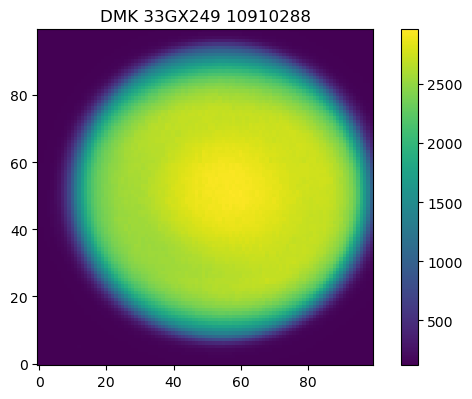

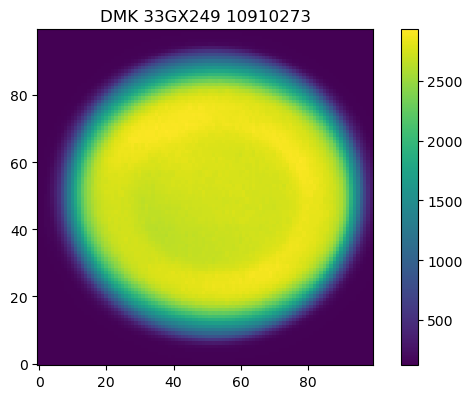

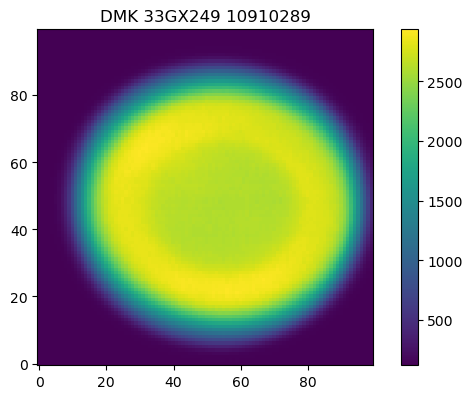

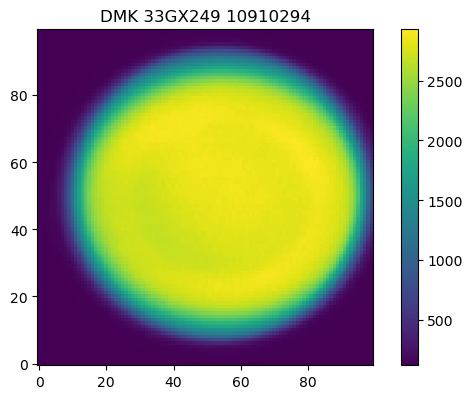

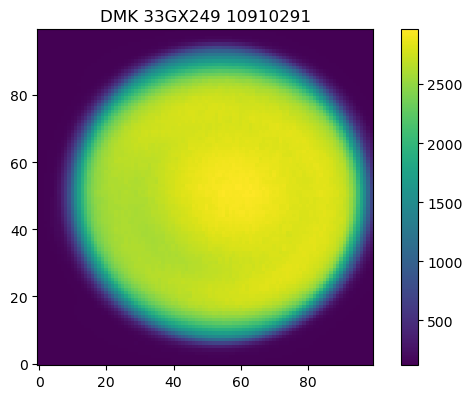

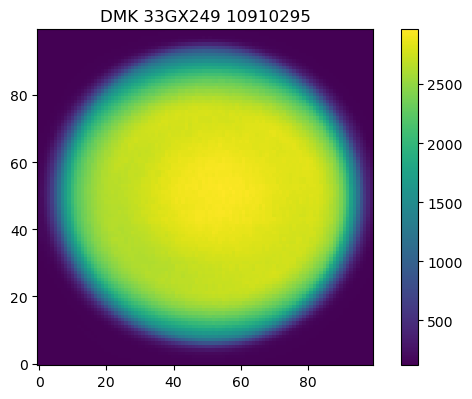

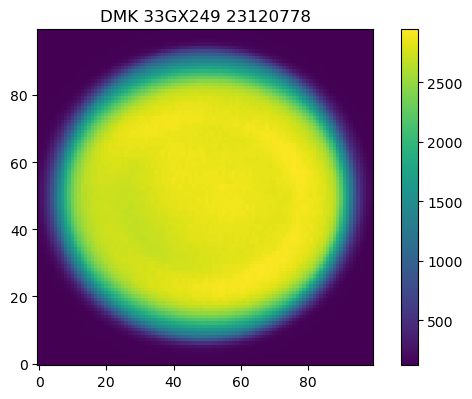

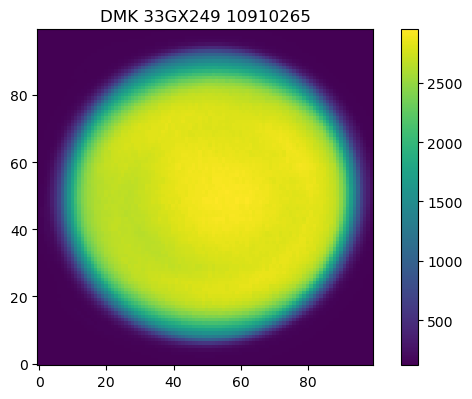

In [11]:
for camera in cameras:
    img = np.mean(np.dstack(ff_prelim[camera.name]), axis=2)
    camera.show_image(img, camera.name)

# Capture Dark Images

In [12]:
subject = 'flat_field_dark_11072023'
for camera in cameras:
    t_exp = ff_exposures[camera.name]
    camera.set_exposure(t_exp)
    ave, std = camera.image_capture_repeat()
    name = f'dark_{camera.name}_ave'
    camera.save_image(name, subject, 'ave', ave)
    name = f'dark_{i}_{camera.name}_std'
    camera.save_image(name, subject, 'std', std)    

Exposure Auto set to 0
Exposure Value set to 0.012122999876737595
Imaging with Exposure: 0.012121999636292458 s
+Good exposure 0.012121999636292458 Image recieved
Imaging with Exposure: 0.012121999636292458 s
+Good exposure 0.012121999636292458 Image recieved
Imaging with Exposure: 0.012121999636292458 s
+Good exposure 0.012121999636292458 Image recieved
Imaging with Exposure: 0.012121999636292458 s
+Good exposure 0.012121999636292458 Image recieved
Imaging with Exposure: 0.012121999636292458 s
+Good exposure 0.012121999636292458 Image recieved
Imaging with Exposure: 0.012121999636292458 s
+Good exposure 0.012121999636292458 Image recieved
Imaging with Exposure: 0.012121999636292458 s
+Good exposure 0.012121999636292458 Image recieved
Imaging with Exposure: 0.012121999636292458 s
+Good exposure 0.012121999636292458 Image recieved
Imaging with Exposure: 0.012121999636292458 s
+Good exposure 0.012121999636292458 Image recieved
Imaging with Exposure: 0.012121999636292458 s
+Good exposure 